In [43]:
%pip install matplotlib
%pip install opencv-python
%pip install numpy


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [44]:
import sys
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt 
from util import convolution2D, display_image 
print("Current working directory:", os.getcwd())
print("Files & folders here:", os.listdir())

Current working directory: c:\Computer Vision\computer_vision_sp2025\homework_02
Files & folders here: ['Elijah London Assignment 2.ipynb', 'hw2.md', 'hw2.pdf', 'images', 'util.py', '__pycache__']


In [45]:
# Utility Function for Panorama Loading
def load_images_from_folder(folder_path):
    """
    Loads all images in the specified folder and returns them as a list.
    """
    images = []
    for filename in sorted(os.listdir(folder_path)):
        img_path = os.path.join(folder_path, filename)
        img = cv2.imread(img_path)
        if img is not None:
            images.append(img)
    return images

Question 1: We implement 'convolution2D'using zero padding to preserve the original dimensions inside of the import file

In [46]:
#Load NYC Image
image_path = "images/NYC_Manhattan.jpeg"
img = cv2.imread(image_path)

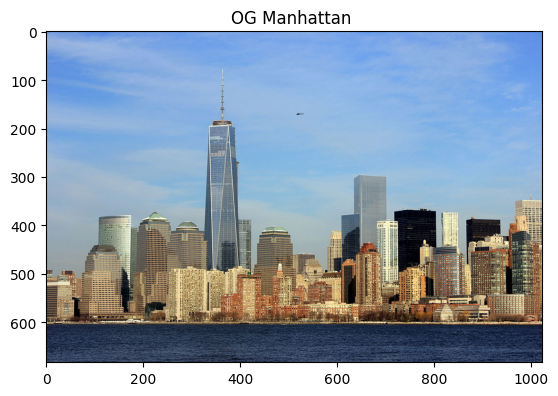

In [47]:
#Display Image 
display_image(img, "OG Manhattan ")

In [48]:
#Define Kernels 
#Embossing Kernels 
emboss_kernel = np.array([
[0, 1, 0,],
[1,-4, 1,],
[0, 1, 0,]
])


Question 2: Applied an embross kernel to increase the intensity within the center of the skyline image and create direction shading around the other points

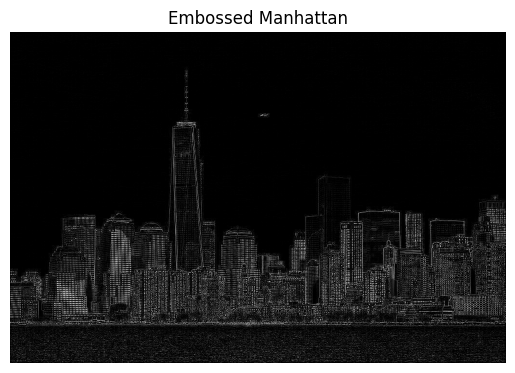

In [49]:
#Embossed Image 
embossed_image = convolution2D(img, emboss_kernel) 
plt.title("Embossed Manhattan") 
plt.imshow(embossed_image,cmap= 'gray') 
plt.axis('off') 
plt.show()

Question 3: Using Lapican Kernel to extract and emphasize skyline edges with the second-order derivatives function

In [50]:
src_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) #convert to grayscale 
img = cv2.GaussianBlur(img,(5,5),0) # Adding Gaussian Blur with 3 X 3 filter size 
edges =cv2.Canny(img, 50,150) # Use Canny edge detector to extract lines
sketch = cv2.bitwise_not(edges) # Invert edges to create a sketch

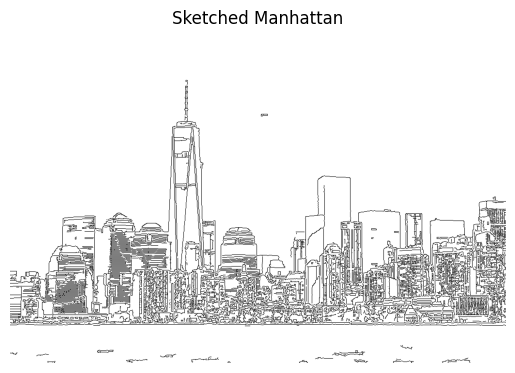

In [51]:
plt.title("Sketched Manhattan") 
plt.imshow(sketch,cmap= 'gray') 
plt.axis('off') 
plt.show()

Question 4: - Converting image to grayscale by, Applying Gaussian Blur to reduce noise, Using Canny edge detection to highlight edges Inverting the edge map to create a sketch-like appearance

In [52]:
#Load office panorma images
office_images = load_images_from_folder("images/office_2")

In [53]:
# Create a stitcher object
stitcher = cv2.Stitcher_create()
status, office_panorama = stitcher.stitch(office_images)

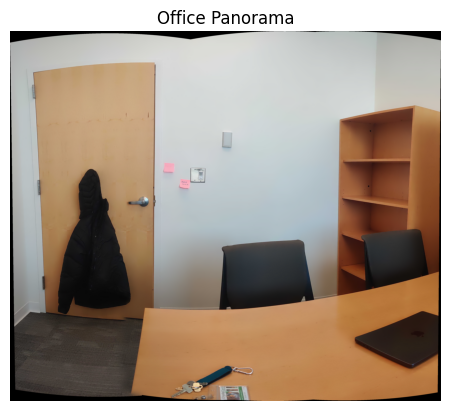

In [54]:
if status == cv2.Stitcher_OK:
    plt.title("Office Panorama")
    office_panorama_rgb = cv2.cvtColor(office_panorama, cv2.COLOR_BGR2RGB)
    plt.imshow(office_panorama_rgb)
    plt.axis('off')
    plt.show()

Question 5: Loaded a set of images from the 'office_2' folder and used OpenCV's stitcher to create a panoramic view. This includes Implemented a utility function to read arbitrary numbers of images from the folder. Used OpenCV's `Stitcher_create()` to perform the panorama operation. Displayed the result with Matplotlib if stitching was successful


Sources: https://learnopencv.com/image-filtering-using-convolution-in-opencv/ 
         https://www.youtube.com/watch?v=UlmmTdJkNDk 
         https://www.youtube.com/watch?v=5l0y-LMM1c0 
         https://dev.to/blamsa0mine/how-to-create-a-pencil-sketch-effect-with-opencv-and-matplotlib-4p48? 
         https://www.geeksforgeeks.org/opencv-panorama-stitching/
